In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [28]:
titles.groupby(cast.year // 10 * 10).size().plot(kind = 'bar')

year
1900        1
1910     2191
1920     3924
1930    13426
1940    14360
1950    14042
1960    13120
1970    14506
1980    18228
1990    24357
2000    46064
2010    70523
2020        6
dtype: int64

### Use groupby() to plot the number of "Hamlet" films made each decade.

,title,year
6076,Hamlet,1948
45868,Hamlet,1990
49845,Hamlet,2017
53323,Hamlet,1910
75880,Hamlet,2015
93103,Hamlet,1976
95334,Hamlet,1987
95529,Hamlet,2000
99599,Hamlet,1921
104050,Hamlet,2011


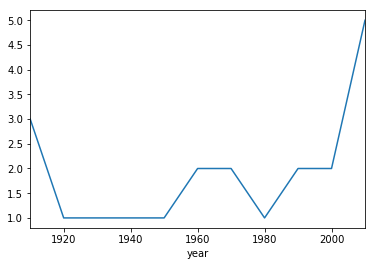

In [27]:
t = titles[titles.title == 'Hamlet']
t.groupby(t.year //10 *10).size().plot()

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [40]:
c = cast[cast.year //10 == 195]
c.groupby(['type', 'n']).size()

type     n    
actor    1.0      6687
         2.0      4620
         3.0      5635
         4.0      5645
         5.0      5663
         6.0      5589
         7.0      5508
         8.0      5299
         9.0      4898
         10.0     4453
         11.0     3929
         12.0     3487
         13.0     2952
         14.0     2539
         15.0     2198
         16.0     1820
         17.0     1519
         18.0     1302
         19.0     1053
         20.0      905
         21.0      762
         22.0      658
         23.0      554
         24.0      437
         25.0      414
         26.0      357
         27.0      293
         28.0      244
         29.0      224
         30.0      194
                  ... 
actress  82.0        4
         83.0        1
         84.0        1
         85.0        1
         86.0        1
         87.0        1
         88.0        1
         89.0        1
         90.0        1
         91.0        1
         92.0        1
         93.0      

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [50]:
c = cast[(cast.n < 6) & (cast.year //10 == 195)]
c.groupby(['type', 'n']).size()

type     n  
actor    1.0    6687
         2.0    4620
         3.0    5635
         4.0    5645
         5.0    5663
actress  1.0    3004
         2.0    4602
         3.0    3187
         4.0    2865
         5.0    2563
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [53]:
c = cast[cast.title.str.contains('Pink Panther')]
c.groupby(['title','year']).size()

title                           year
Curse of the Pink Panther       1983    67
Revenge of the Pink Panther     1978    67
Son of the Pink Panther         1993    46
The Pink Panther                1963    21
                                2006    90
The Pink Panther 2              2009    84
The Pink Panther Strikes Again  1976    68
The Return of the Pink Panther  1975    30
Trail of the Pink Panther       1982    41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [56]:
c = cast[cast.name == 'Frank Oz']
fo = c.groupby(['year', 'title']).size()
fo[fo>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [57]:
c = cast[cast.name == 'Frank Oz']
fo = c.groupby(['character']).size()
fo[fo>1]

character
Animal            6
Bert              3
Cookie Monster    4
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

In [68]:
c = cast[(cast.n == 1) & (cast.year >= 2000)]
c.name.value_counts()
#c = c.groupby(['name', 'year']).size()
#c.unstack()

Mammootty                  89
Mohanlal                   89
Dileep (III)               58
Akshay Kumar               57
Eric Roberts               53
Amitabh Bachchan           53
Riaz                       49
Prithviraj Sukumaran       46
Ajay Devgn                 44
Siddhant Mahapatra         42
Shakib Khan                42
Sudeep                     39
Nagarjuna Akkineni         39
Nicolas Cage               38
Suresh Gopi                37
Salman Khan                35
Joseph Vijay               34
Jayaram                    34
Kamal Haasan               34
Adam Sandler               32
Michael Madsen             32
Ajith (II) Kumar           32
Tom Sizemore               32
Isabelle Huppert           31
Vikram (XXIII)             31
Andy Lau                   31
Suriya                     29
Sanjay Dutt                29
Shah Rukh Khan             28
Danny Trejo                27
                           ..
Adam (XII) Green            1
Paraskeva Djukelova         1
Jon Jon Ge